# Travaux dirigés/pratiques méthodes numériques et simulation
## Chapitre 2

In [1]:
from math import *
import numpy as  np  
import scipy as sp
import scipy.stats as stats
import math

from pylab import *

## Exercice 1 (Simulation du mouvement brownien)

On considère un maillage régulier $0=t_0<t_1<\dots<t_N=T$, reprendre les méthodes proposées en cours et les implémenter pour simuler un m.b.s. $W$ sur l'intervalle $[0,T]$ 
- méthode incrémentale (a.n. $N=1000$, $T=1$)
- méthode de Karhunen-Loeve (a.n. $N=100$, $T=1$, $K \in \{20, 40, 50, 100,200\}$)

#### Méthode incrémentale

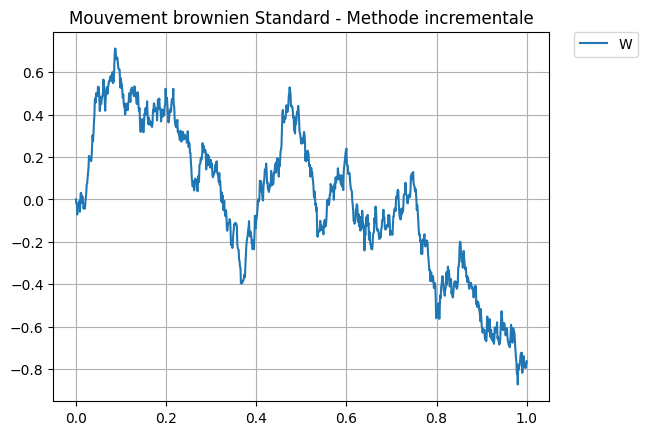

In [4]:
# grille temporelle 

N = 1000  # Nombre de points
T = 1.0   # Temps total
dt = T / N
tps = np.linspace(0, T, N+1)

# Simulation incrémentale
W = np.zeros(N+1)
incr = np.random.normal(0, 1, N)*np.sqrt(dt)
W[1:] = np.cumsum(incr)

# trace 
plt.figure(1)
plt.grid()
plt.plot(tps,W,label="W")
plt.title('Mouvement brownien Standard - Methode incrementale')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
 

#### Méthode de Karhunen-Loève

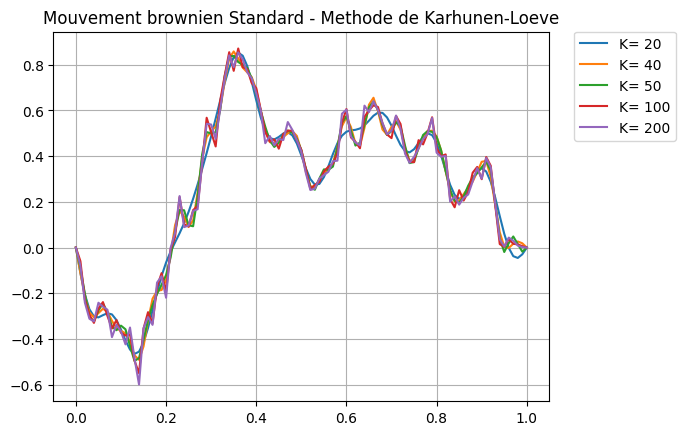

In [9]:
# grille temporelle
N = 100
T = 1.0
tps = np.linspace(0, T, N+1) 
 

# fonctions de base
def phi(t,m):
    return(2*np.sqrt(2*T)/((2*(m+1))*np.pi)*sin((2*(m+1))*np.pi*t/2*T))

# decomposition de KL 
KMAX   = 200
sample = np.random.normal(0,1,KMAX+1)
TK     = [20, 40, 50, 100,200]
ind    = np.linspace(0,KMAX,KMAX)
for l in range(0,np.size(TK)):
   K  = TK[l]
   W  = np.zeros(np.size(tps,0))
   xi = sample[0:K]
   for i, t in enumerate(tps):
       for k in range(0,K):
           W[i] = W[i] + xi[k] * phi(t, k) 
   # trace
   plt.figure(1)
   plt.grid()
   plt.plot(tps,W,label= 'K= %i' %K)
   plt.title('Mouvement brownien Standard - Methode de Karhunen-Loeve')
   plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

## Exercice 2 (Les trajectoires du m.b.s.  ne sont pas $\mathcal{C}^1([0,T])$)

Soit $W$ un m.b.s., on définit $0=t_0<t_1<t_2<\dots<t_n=T$ un maillage régulier de $[0,T]$ avec $t_i = i h, h = \frac T n$. On définit la variation quadratique du mouvement brownien par 
$$
V = \lim_{n \to \infty } V_n  
$$
au sens de la limite en norme $L^2(\Omega)$ avec $V_n = \sum_{i=0}^{n-1} |W_{t_{i+1}}-W_{t_{i}}|^2$.


>**Question 1.** Montrer que $\mathbb{V}(V_n)=\mathbb{E}(|V_n-T|^2)$ en déduire que $\mathbb{E}(|V_n-T|^2) \to 0$ quand $n\to \infty$. Conclure.
> On rappelle que si $X \sim \mathcal{N}(0,\sigma^2)$ alors $\mathbb{E}(X^2) = \sigma^2$ et $\mathbb{E}(X^4) = 2\sigma^4$.


>**Question 2.** Que se passerait-il pour la convergence de $S_n$ si on remplaçait $W$ par une fonction $w \in \mathcal{C^1}([0,T])$.

## Exercice 3 (Pont brownien)

Soit $W$ un m.b.s et $ 0\le u \le v$. La loi de  $\{W_t\}_{u \le t \le v}$ conditionnellement à $W_u$ et $W_v$ est celle de 
$$
\left\{W_u + (W_v-W_u)\dfrac{t-u}{v-u} + W_t^{u,v}\right\}_{u\le t \le v}, 
$$
où $\{W_t^{u,v}\}_{u\le t \le v}$ est un {\bf pont brownien} i.e. est un processus gaussien centré, de fonction de covariance 
$$
\mathrm{cov}(W_t^{u,v}, W_s^{u,v}) = \dfrac{(s-u)(v-t)}{v-u}
$$
indépendant de $\{W_s : s \le u; W_s : s \ge v\}$.

Soit $W$ un m.b.s. simulé pour $N+1$ instants distincts $\{W_{t_0},\dots,W_{t_N}\}$ avec $t_i = i \Delta t$. On cherche à simuler une nouvelle réalisation du brownien pour $t_{i+1/2} = \dfrac{t_i+t_{i+1}} {2}$. 

>**Question 1.** Quelle est la loi de $W_t$ conditionnellement à  $W_{t_i}$ et $W_{t_i+1}$ ? Proposer une stratégie pour simuler $W_{t_{i+1/2}}$. 



>**Question 2.** Par la suite on supposera que les espérances sont conditionnées par  rapport à  $W_{t_i}$ et $W_{t_i+1}$. Montrer que 
$$
\mathbb{E}(W_{t_{i+1/2}}) = \dfrac{W_{t_i}+W_{t_{i+1}}}{2}
 \text{ et } 
\mathbb{V}(W_{t_{i+1/2}}) = \dfrac{\Delta t}{4}. 
$$



>**Question 3.** Tester la méthode.

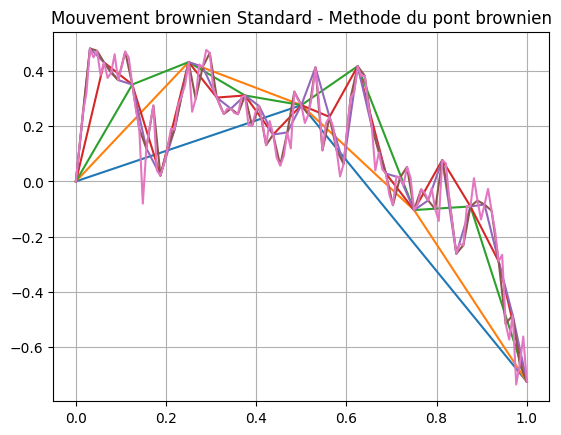

In [13]:
# data
T      =   1                    
K      =   7              # Nombre de raffinements
N      =   2**K +1              # Nombre de points
tps    =   np.array([0,T])          # Extremites de l'interv. de temps 0,T
W      =   np.array([0, np.random.normal(0, np.sqrt(T))])             # Valeurs au bord W_0,W_T

# construction de W par pont brownien
for i in range(1,K+1):
   #print('i',i)
   Wold   = W
   tpsold = tps
   for j in range(1,2**(i-1)+1):
       m      = (Wold[j]+Wold[j-1])/2
       sigma2 = (tpsold[j]-tpsold[j-1])/4
       Wj     = np.sqrt(sigma2)*np.random.normal(0,1)+m
       tpsj   = (tpsold[j-1]+tpsold[j])/2
       W      = np.concatenate((W[:2*(j-1)+1], [Wj], W[2*(j-1)+1:]))
       tps    = np.concatenate((tps[:2*(j-1)+1], [tpsj], tps[2*(j-1)+1:]))         

   # trace
   plt.figure(1)
   plt.grid()
   plt.plot(tps,W)
   plt.title('Mouvement brownien Standard - Methode du pont brownien')

plt.show()

